Goal: Estimate the percentage of workers whose jobs are currently remote-ready.

Process:

1. Organize each of the sectors (with data) into categories of available workers
2. Take the average of each sectors based on percentage
3. Plug the percentage average into a linear regression with year based on number of people in the market.


In [13]:
import numpy as np
import numpy.linalg as la
import pandas as pd

# Dictionary to store DataFrames
dfs = {}

# List of CSV file names (update paths as needed)
csv_files = {
    "seattle": "remote_data/seattle.csv",
    "omaha": "Cape Hatteras Mapping Conversion.csv",
    "scranton": "Kenai Fjords NP Mapping Conversion.csv",
    "liverpool": "Olympic NP Mapping Conversion.csv",
    "barry": "Padre Island Mapping Conversion.csv"
}

# Load each CSV into a Pandas DataFrame
# for name, file in csv_files.items():
#     dfs[name] = pd.read_csv(file)

seattle_df = pd.read_csv("remote_data/seattle.csv")

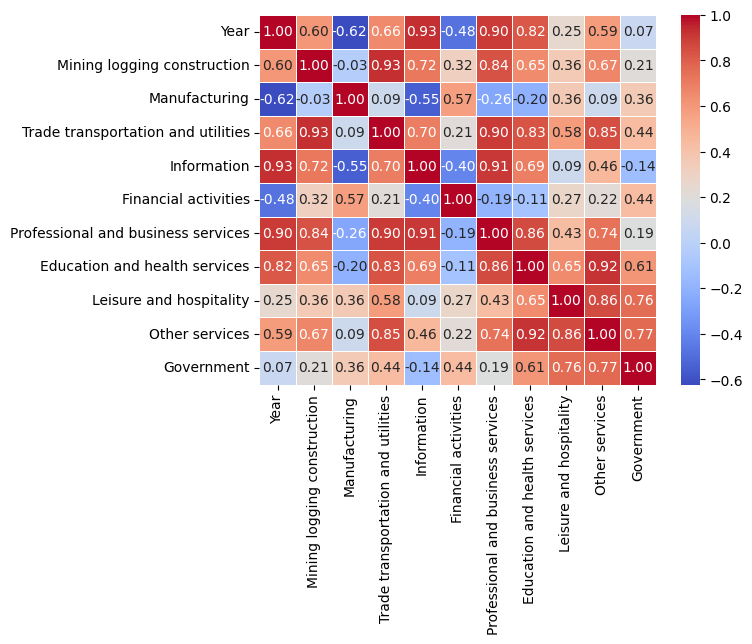

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

seattle_corr_matrix = seattle_df.corr()

# The below line sets the size
#       plt.figure(figsize=(8, 6))

# This line creates a plot (in matplotlib?) with the heatmap given the correlation matrix?
sns.heatmap(seattle_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
#plt.title("Correlation Heatmap")
plt.show()

The graph tells us that some are growing with time, others are not...


[2000 2005 2010 2015 2019 2020 2021]
[101700 104700  83600 107100 127600 129900 109600]
[212800 171300 167000 188200 184300 168400 142200]
[325600 313200 301600 354400 398000 390300 332600]
[ 79500  77700  87700  97500 128400 133700 139000]
[101800 106700  92100  95900 101400 100400  87600]
[220500 214400 220700 268600 302100 295700 277500]
[183700 198400 231500 251300 283000 272100 223500]
[145800 152500 155700 185200 207800 150600 133000]
[57800 61800 63200 70200 78700 71100 59300]
[236000 252100 264200 270300 275500 266000 206700]


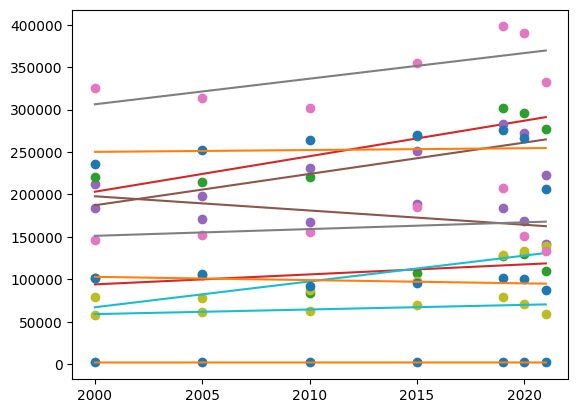

In [15]:
pts = np.array([[2, 4], [3, 2], [5, 1], [6, 0]])
# Reformat looks like:
# [[2, 4], 
#  [3, 2], 
#  [5, 1], 
#  [6, 0]]

slope_const_pairs = []

for column_label in seattle_df:
    t_line = seattle_df["Year"]
    y_line = seattle_df[column_label].values

    # Ended up having 1s second
    A_line_transpose = np.array([t_line , t_line ** 0])
    A_line = A_line_transpose.T

    [slope, const] = la.inv(A_line.T @ A_line) @ A_line.T @ y_line
    print(y_line)

    slope_const_pairs.append([slope, const])

    plt.plot(t_line, y_line, 'o')
    plt.plot(t_line, t_line * slope + const)

plt.show()
# Note that we are solving for:
# y = A x
# y_values = [t_values, 1] [x_variable, best_constant]
# Solve for x_variable, best_constant
# 

# Ended up having 1s second
# A_line_transpose = np.array([t_line , t_line ** 0])
# A_line = A_line_transpose.T

# A.T y = A.T A x
# for best solution of x
# x = (A.T A)^-1 @ (A.T y)



In [30]:
# Now we have the LSR Line for each of our data points,
# we can plot them to find their values for 2024 and 2027:

slope_const_pairs = np.array(slope_const_pairs)
print(slope_const_pairs[:,0])
jobs_2024 = slope_const_pairs[1:, 0] * 2024 + slope_const_pairs[1:, 1]
jobs_2027 = slope_const_pairs[1:, 0] * 2027 + slope_const_pairs[1:, 1]

percent_list = np.array([0.5, 1.0, 15.5, 76.0, 87.5, 75.4, 35.0, 13.0, 18.5, 6.0]) / 100

percent_dot_2024 = sum(jobs_2024 * percent_list) 
print(percent_dot / sum(jobs_2024))

def extrapolate_from_pairs(slope_const):
    percent_list = np.array([0.5, 1.0, 15.5, 76.0, 87.5, 75.4, 35.0, 13.0, 18.5, 6.0]) / 100
    temp_pairs = np.array(slope_const)
    jobs2024 = temp_pairs[1:, 0] * 2024 + temp_pairs[1:, 1]
    jobs2027 = temp_pairs[1:, 0] * 2027 + temp_pairs[1:, 1]  
    percent_dot_2024 = sum(jobs_2024 * percent_list) 
    percent_dot_2027 = sum(jobs_2027 * percent_list) 
    return percent_dot_2024, percent_dot_2027

[ 1.00000000e+00  1.17655572e+03 -1.67879884e+03  3.01780029e+03
  3.04240232e+03 -3.83719247e+02  4.18625181e+03  3.69319826e+03
  7.96273517e+02  5.45296671e+02  2.14688857e+02]
0.3176569458249358
